# **신경망의 추론 처리 - MNIST 탐색**

MNIST 데이터 셋을 가지고 추론을 수행하는 신경망 구현  

Jupyter notebook이나 터미널에서 아래처럼 dataset을 준비한다.

user@server:~repos/710231-20F/03_NeuralNetwork$ mkdir dataset  

user@server:~repos/710231-20F/03_NeuralNetwork$ cd dataset  

user@server:~repos/710231-20F/03_NeuralNetwork$ ls  

user@server:~repos/710231-20F/03_NeuralNetwork$ wget https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

**dataset**  
각 이미지는 28x28 크기를 가진다. 이것을 일렬로 펼치면 784(28x28)차원의 벡터가 됨  
즉 784의 입력(사진)을 넣고 -> 10개의 결과값을 얻음

In [2]:
import sys, os
#sys.path.append(os.pardir)

#dataset/mnist.py 에서 load_mnist() 함수를 가져온다
from dataset.mnist import load_mnist 


import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [4]:
x_test, t_test = get_data() #x_test:이미지, t_test:라벨

In [5]:
28*28 #이미지 하나

784

In [6]:
x_test.shape 

(10000, 784)

In [7]:
t_test.shape #이미지가 총 10000개가 있다

(10000,)

In [8]:
t_test[0] #첫번째 이미지는 7이다

7

In [9]:
t_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
x_test[0].shape 

(784,)

In [11]:
img = x_test[0].reshape((28 ,28)) #reshape은 튜플을 인자로 받음
#reshape(28 ,28)로 할 경우 2가지 argument를 넣는거임

784 -> 28,28

In [12]:
img.shape

(28, 28)

In [13]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

0은 하얀색 1로갈수록 검은색

### 하나 그려보기

In [14]:
idx_to_draw = 4
img = x_test[idx_to_draw].reshape((28, 28))

In [16]:
x_test[idx_to_draw].shape

(784,)

In [15]:
img.shape

(28, 28)

이미지 784 -> 28,28

In [17]:
title = '#{}'.format(t_test[idx_to_draw])
print(title)

#4


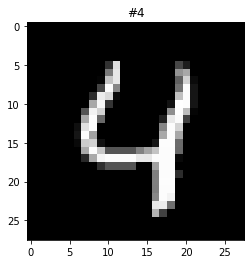

In [21]:
#plt.plot(img)
plt.imshow(img, cmap='gray')
plt.title(title)
plt.show()

### one-hot encoding 방법을 이용해서 그림그리기  
hint : t_test[idx_to_draw] 을 one-hot함수 완성

MNIST 레이블은 0~9 이다. 이것은 숫자가 아닌 카테고리값  
한 요소만 1인 벡터 <예> 
* 5는 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  
* 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
def onehot(number):
    ### START CODE HERE ###
    onehot_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    onehot_list[number] = 1
    onehot_number = onehot_list
    ### END CODE HERE###
    return onehot_number

In [46]:
number_converted = '#{}'.format(onehot(t_test[idx_to_draw]))

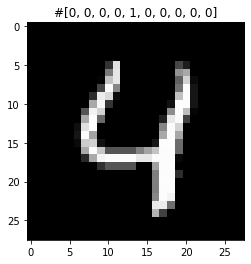

In [47]:
#plt.plot(img)
title = number_converted#'[0 0 0 0 1 0 0 0 0 0]' #one-hot encoding
plt.imshow(img, cmap='gray')
plt.title(title)
plt.show()